# Étape 1 : Chargement et aperçu des données

In [2]:
import pandas as pd

# 🔸 1. Charger le dataset à partir du fichier CSV
df = pd.read_csv("test.csv")  # Remplace "nom_du_fichier.csv" par le vrai nom

# 🔸 2. Afficher les premières lignes pour voir à quoi ça ressemble
print(df.head())

# 🔸 3. Avoir un résumé de la structure (colonnes, types, valeurs manquantes)
print("\nRésumé du dataset :")
print(df.info())

# 🔸 4. Compter les valeurs manquantes par colonne
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

# 🔸 5. Taille du dataset
print(f"\nNombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")


   Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2                      

## Résumé rapide de l’état des données

| Point                           | Détail |
|--------------------------------|--------|
| Nombre de lignes                | 25 976 |
| Nombre de colonnes              | 25 |
| Valeurs manquantes              | 83 valeurs manquantes dans `Arrival Delay in Minutes` |
| Variable cible                  | `satisfaction` (binaire : `"satisfied"` ou `"neutral or dissatisfied"`) |
| Variables quantitatives         | `Age`, `Flight Distance`, toutes les notes de services, les délais (`delays`) |
| Variables qualitatives          | `Gender`, `Customer Type`, `Type of Travel`, `Class`, `satisfaction` |
| Colonnes inutiles à supprimer  | `Unnamed: 0` et `id` (elles ne servent pas à l’analyse) |


# Étape 2 : Nettoyage des données

In [3]:
# 🔸 Supprimer les colonnes inutiles
df_clean = df.drop(columns=["Unnamed: 0", "id"])

# 🔸 Supprimer les lignes où il manque "Arrival Delay in Minutes"
#    (ou remplacer par la moyenne si tu préfères)
df_clean = df_clean.dropna(subset=["Arrival Delay in Minutes"])

# 🔸 Vérification après nettoyage
print(f"Nombre de lignes après nettoyage : {df_clean.shape[0]}")
print(f"Valeurs manquantes restantes :\n{df_clean.isnull().sum().sum()}")

# Optionnel : réinitialiser les index après suppression
df_clean = df_clean.reset_index(drop=True)


Nombre de lignes après nettoyage : 25893
Valeurs manquantes restantes :
0


Le dataset est maintenant propre et prêt à l’analyse :

* On a supprimer les colonnes inutiles
* On a supprimer les lignes avec valeurs manquantes
* Obtenir un jeu de données final avec 25 893 lignes

# Étape 3 : Analyse univariée des variables

On va regarder :

* Les variables quantitatives : stats descriptives, distributions

* Les variables qualitatives : fréquences, répartition

1. **Variables quantitatives : stats descriptives**

In [4]:
# Liste des variables quantitatives
quant_vars = [
    "Age", "Flight Distance", "Inflight wifi service",
    "Departure/Arrival time convenient", "Ease of Online booking",
    "Gate location", "Food and drink", "Online boarding", "Seat comfort",
    "Inflight entertainment", "On-board service", "Leg room service",
    "Baggage handling", "Checkin service", "Inflight service", "Cleanliness",
    "Departure Delay in Minutes", "Arrival Delay in Minutes"
]

# 🔹 Statistiques descriptives
print(df_clean[quant_vars].describe())


                Age  Flight Distance  Inflight wifi service  \
count  25893.000000     25893.000000           25893.000000   
mean      39.621983      1193.753254               2.723709   
std       15.134224       998.626779               1.334711   
min        7.000000        31.000000               0.000000   
25%       27.000000       414.000000               2.000000   
50%       40.000000       849.000000               3.000000   
75%       51.000000      1744.000000               4.000000   
max       85.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                       25893.000000            25893.000000   
mean                            3.046422                2.755996   
std                             1.532971                1.412552   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                     

2. **Variables qualitatives : distribution des catégories**





In [5]:
# Liste des variables qualitatives
qual_vars = ["Gender", "Customer Type", "Type of Travel", "Class", "satisfaction"]

# 🔹 Fréquences de chaque catégorie
for col in qual_vars:
    print(f"\n{col} :")
    print(df_clean[col].value_counts())



Gender :
Gender
Female    13127
Male      12766
Name: count, dtype: int64

Customer Type :
Customer Type
Loyal Customer       21111
disloyal Customer     4782
Name: count, dtype: int64

Type of Travel :
Type of Travel
Business travel    17980
Personal Travel     7913
Name: count, dtype: int64

Class :
Class
Business    12457
Eco         11524
Eco Plus     1912
Name: count, dtype: int64

satisfaction :
satisfaction
neutral or dissatisfied    14528
satisfied                  11365
Name: count, dtype: int64


## Analyse des variables qualitatives

| Variable        | Répartition (principale observation) |
|----------------|----------------------------------------|
| Gender          | Quasiment équilibré (51% femmes, 49% hommes) |
| Customer Type   | Environ 81% de clients fidèles |
| Type of Travel  | Environ 69% voyagent pour affaires |
| Class           | Répartition relativement équilibrée, avec une dominance de la classe Business (48%) |
| Satisfaction    | 44% de clients satisfaits, 56% non satisfaits |


# statistiques descriptives de toutes les variables

In [6]:
df_clean[quant_vars].describe().T.round(2)  # .T pour transposer le tableau, .round(2) pour arrondir


,count,mean,std,min,25%,50%,75%,max
Age,25893.0,39.62,15.13,7.0,27.0,40.0,51.0,85.0
Flight Distance,25893.0,1193.75,998.63,31.0,414.0,849.0,1744.0,4983.0
Inflight wifi service,25893.0,2.72,1.33,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,25893.0,3.05,1.53,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,25893.0,2.76,1.41,0.0,2.0,3.0,4.0,5.0
Gate location,25893.0,2.98,1.28,1.0,2.0,3.0,4.0,5.0
Food and drink,25893.0,3.21,1.33,0.0,2.0,3.0,4.0,5.0
Online boarding,25893.0,3.26,1.36,0.0,2.0,4.0,4.0,5.0
Seat comfort,25893.0,3.45,1.32,1.0,2.0,4.0,5.0,5.0
Inflight entertainment,25893.0,3.36,1.34,0.0,2.0,4.0,4.0,5.0


Histogrammes (distribution de variables quantitatives : Age, Flight Distance, Departure Delay in Minutes )

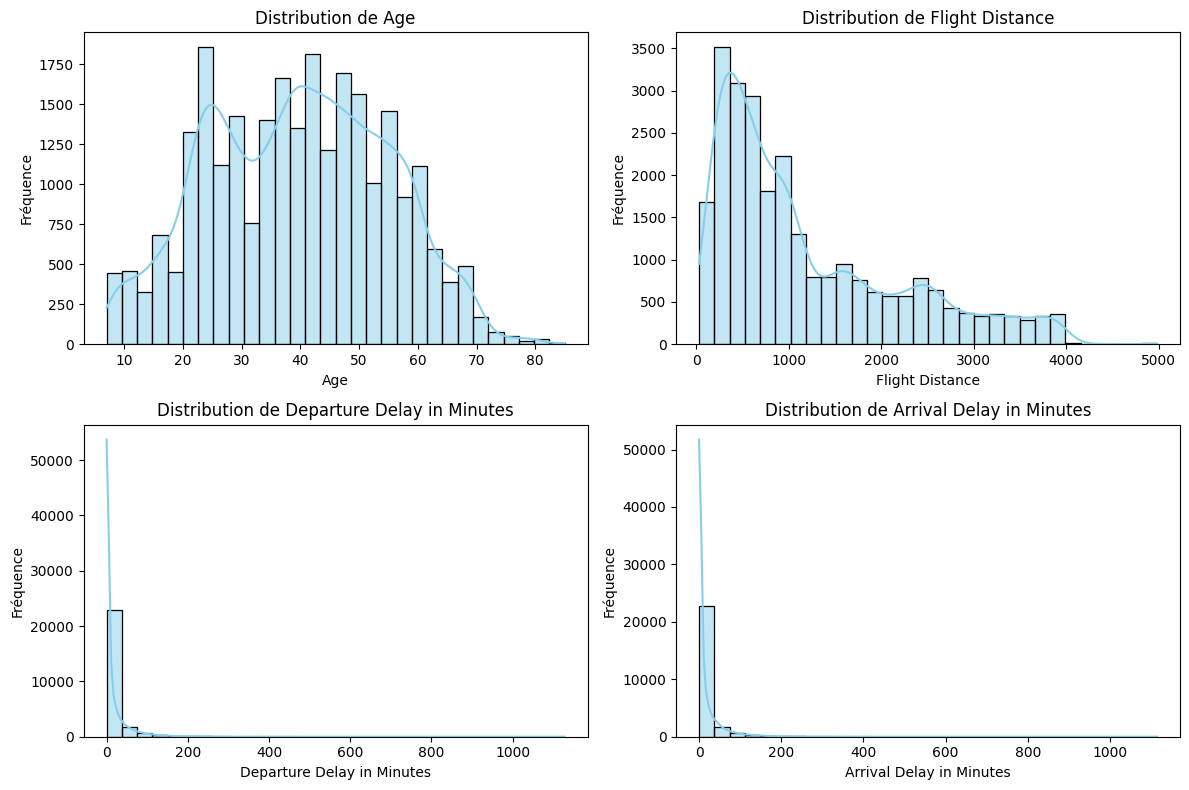

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste de variables à visualiser
vars_hist = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]

# Taille des figures
plt.figure(figsize=(12, 8))

# Plot
for i, var in enumerate(vars_hist):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df_clean, x=var, kde=True, bins=30, color="skyblue")
    plt.title(f'Distribution de {var}')
    plt.xlabel(var)
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()


## Analyse des variables continues

| Variable               | Forme de distribution         | Observation clé |
|------------------------|-------------------------------|------------------|
| Age                    | Multimodale, assez symétrique | Deux pics vers 25 et 45 ans |
| Flight Distance        | Asymétrique à droite          | La majorité des vols font moins de 1000 km |
| Departure Delay (min)  | Fortement asymétrique         | La plupart des vols sont à l'heure ou peu retardés |
| Arrival Delay (min)    | Fortement asymétrique         | Même constat qu'au départ, avec quelques valeurs extrêmes |

### Conclusions possibles

- `Flight Distance` pourrait influencer le type de service reçu → potentiellement lié à la satisfaction.
- Les retards sont rares mais parfois extrêmes → à considérer dans des analyses comme l'ACP ou le clustering.
- L’`Age` peut jouer un rôle dans le type de service préféré ou la satisfaction → à explorer avec des boxplots ou des analyses groupées.


<ipython-input-8-5c35dbcc3b72>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="satisfaction", y=var, palette="coolwarm")
<ipython-input-8-5c35dbcc3b72>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="satisfaction", y=var, palette="coolwarm")
<ipython-input-8-5c35dbcc3b72>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="satisfaction", y=var, palette="coolwarm")
<ipython-input-8-5c35dbcc3b72>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed 

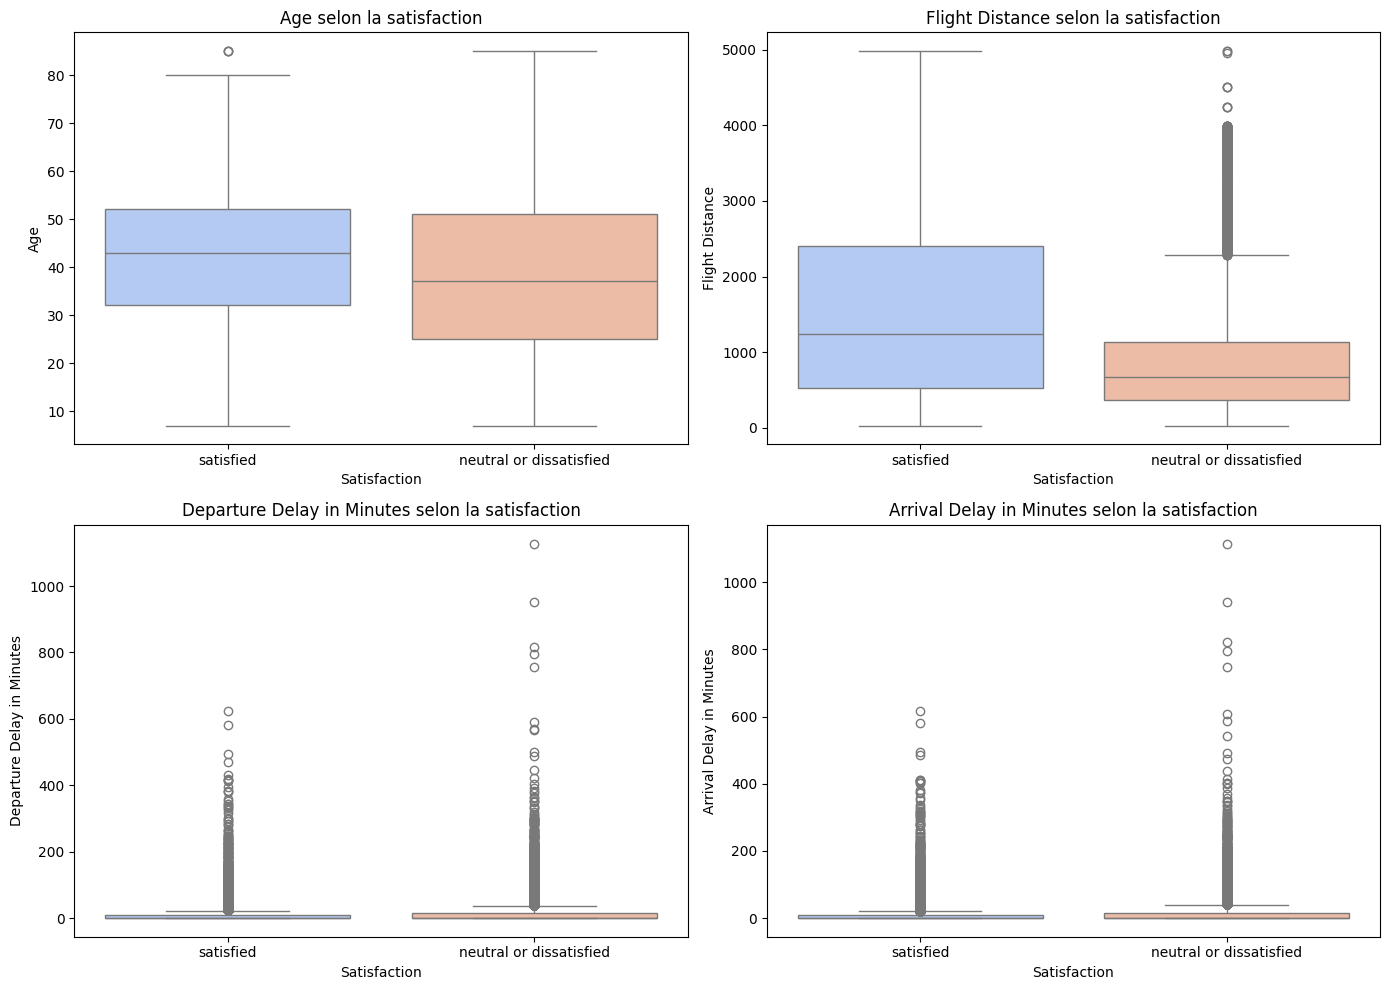

In [8]:
vars_box = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]

plt.figure(figsize=(14, 10))

for i, var in enumerate(vars_box):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df_clean, x="satisfaction", y=var, palette="coolwarm")
    plt.title(f"{var} selon la satisfaction")
    plt.xlabel("Satisfaction")
    plt.ylabel(var)

plt.tight_layout()
plt.show()


## Analyse : Influence potentielle sur la satisfaction

| Variable             | Influence potentielle sur la satisfaction |
|----------------------|--------------------------------------------|
| Âge                  | Peu d’influence directe visible, profils d’âge assez similaires |
| Flight Distance      | Corrélé à la satisfaction : les vols plus longs sont associés à une satisfaction plus élevée |
| Départ en retard     | Les valeurs extrêmes (outliers) sont plus fréquentes chez les clients insatisfaits |
| Arrivée en retard    | Même constat : les gros retards sont souvent une source d’insatisfaction |


<ipython-input-9-3508595e0486>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="satisfaction", y=var, palette="coolwarm")
<ipython-input-9-3508595e0486>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="satisfaction", y=var, palette="coolwarm")
<ipython-input-9-3508595e0486>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="satisfaction", y=var, palette="coolwarm")
<ipython-input-9-3508595e0486>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

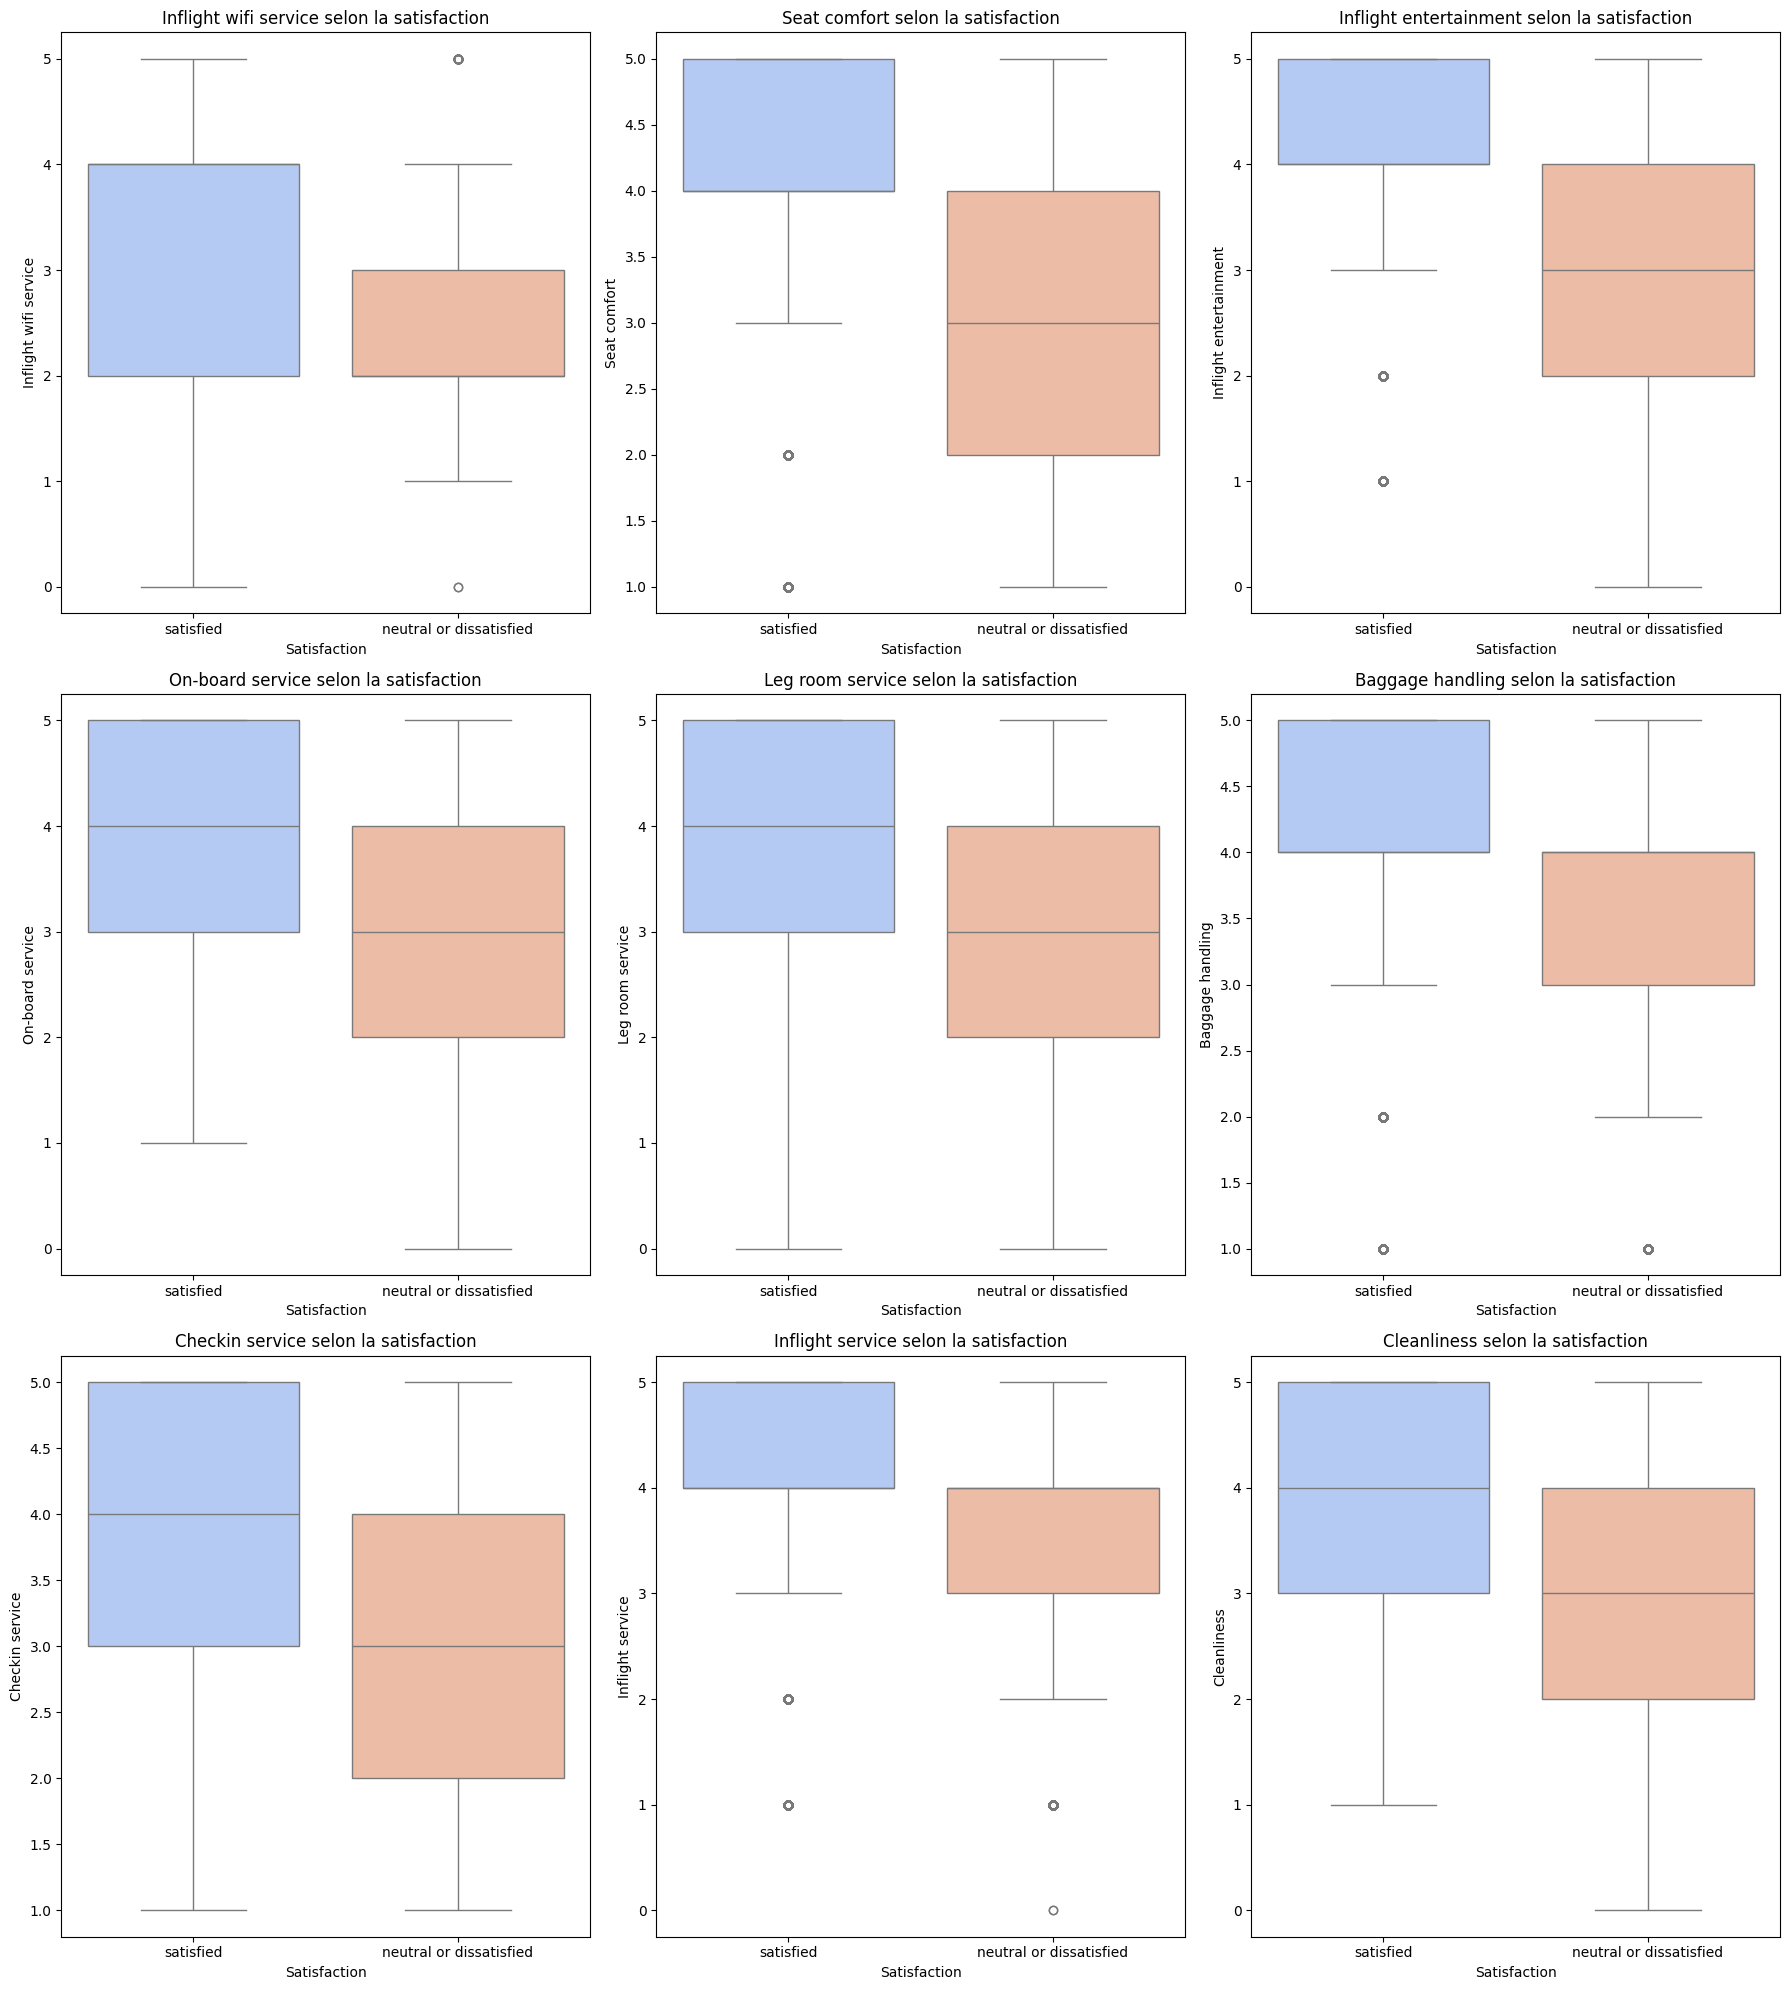

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des variables de service à visualiser
service_vars = [
    "Inflight wifi service",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness"
]

# Taille de la figure globale
plt.figure(figsize=(18, 20))

# Générer un boxplot pour chaque variable
for i, var in enumerate(service_vars):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df_clean, x="satisfaction", y=var, palette="coolwarm")
    plt.title(f"{var} selon la satisfaction")
    plt.xlabel("Satisfaction")
    plt.ylabel(var)

plt.tight_layout()
plt.show()


## Analyse des facteurs liés à la satisfaction

### Facteurs fortement liés à la satisfaction

| Variable               | Pourquoi elle est importante ? |
|------------------------|-------------------------------|
| Inflight service       | Médiane très élevée chez les satisfaits, très basse sinon. Distribution serrée pour les satisfaits. |
| Seat comfort           | Très nette différence de médiane et de concentration. |
| Inflight entertainment | Les satisfaits donnent presque toujours 4 ou 5. |
| On-board service       | Belle séparation des distributions entre les deux groupes. |


---

### Facteurs modérément liés à la satisfaction

| Variable          | Pourquoi elle est "moyennement" discriminante ? |
|-------------------|--------------------------------------------------|
| Checkin service   | Moins de différence dans les médianes. |
| Cleanliness       | Un peu de bruit, mais les tendances restent visibles. |
| Baggage handling  | Beaucoup de notes hautes dans les deux groupes. |



---

### Critères à explorer plus finement

| Variable              | Pourquoi ? |
|-----------------------|------------|
| Inflight wifi service | Distributions mixtes dans les deux groupes, avec plus de variabilité. |
| Leg room service      | Analyse floue, dépend peut-être du contexte (classe, type de vol…). |




# Comprendre les facteurs de satisfaction ?

* **Heatmap de corrélation**

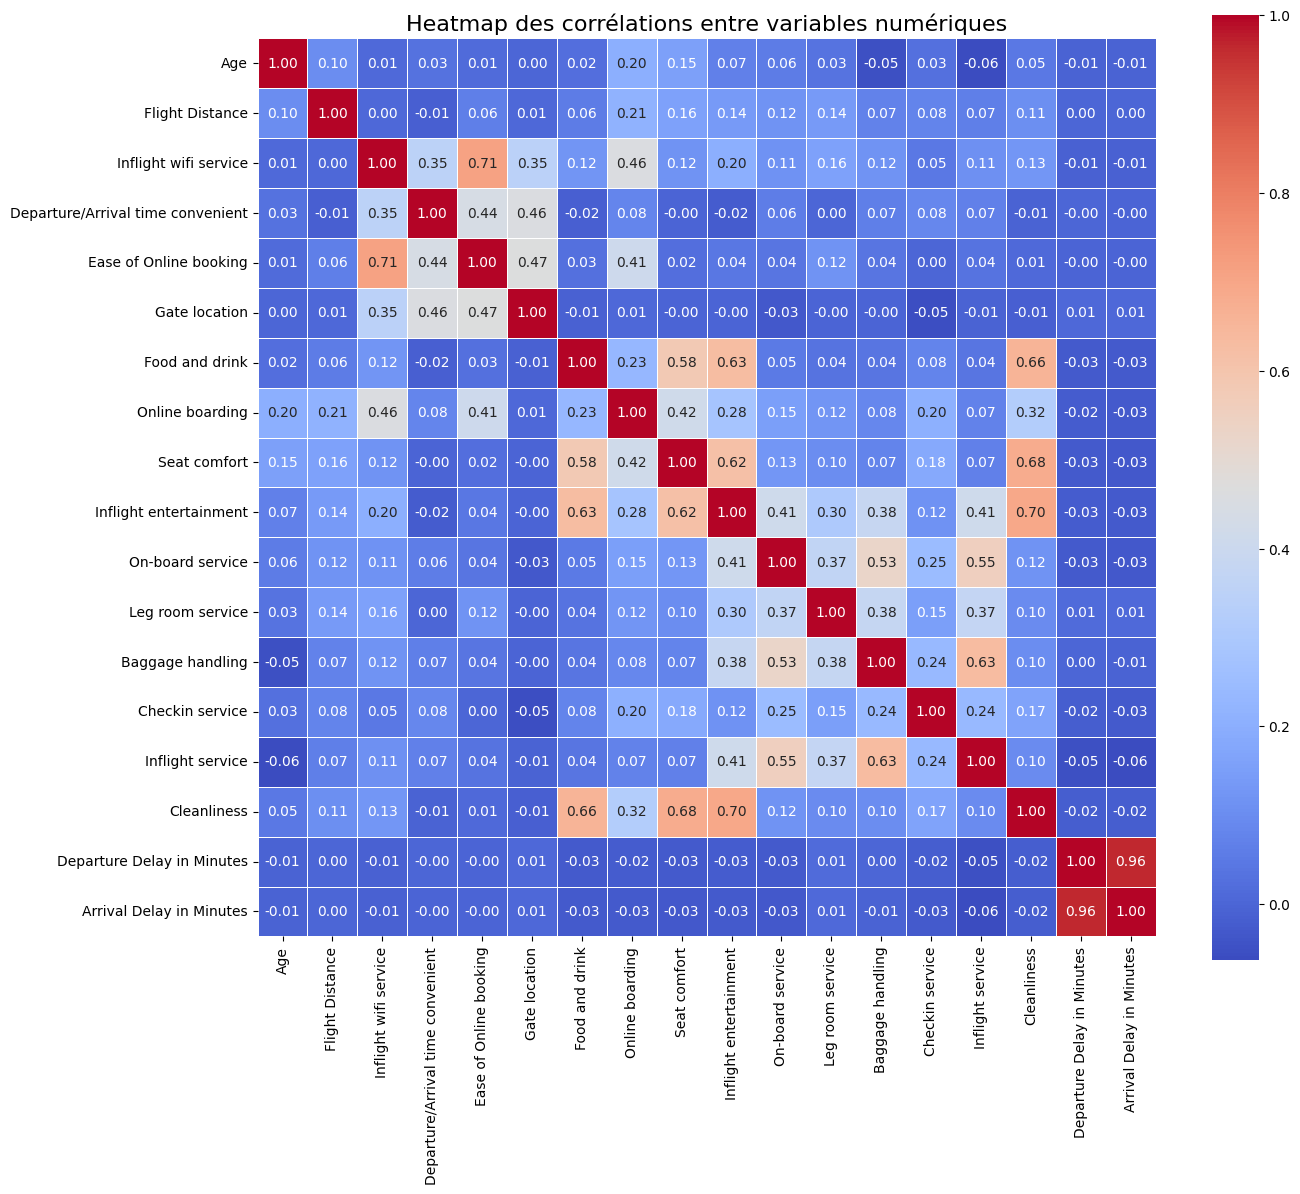

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection uniquement des variables numériques
numeric_vars = df_clean.select_dtypes(include=["int64", "float64"])

# Calcul de la matrice de corrélation
corr_matrix = numeric_vars.corr()

# Affichage du heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=.5)
plt.title("Heatmap des corrélations entre variables numériques", fontsize=16)
plt.tight_layout()
plt.show()


## Analyse générale

Le jeu de données semble structuré autour de trois grands pôles :

- **Retards de vol** : fortement corrélés entre eux, mais peu aux autres variables.
- **Expérience de service à bord** : nombreuses corrélations internes entre variables liées au confort et au service.
- **Services numériques / en ligne** : ensemble cohérent de variables liées à l’expérience digitale.

---

## Interprétations clés

### 1. Retards : fort lien interne, mais pas avec la satisfaction

- **Departure Delay** ↔ **Arrival Delay** : corrélation très forte (**0.96**), ce qui est attendu.
- Peu ou pas de lien avec la variable de satisfaction : les passagers semblent dissocier les retards du jugement sur les services.

Conclusion : même avec du retard, un bon service en vol peut préserver la satisfaction.

---

### 2. Services à bord : cœur de la satisfaction

Variables très corrélées entre elles :

- `Seat comfort`, `Cleanliness`, `Inflight entertainment`, `On-board service`, etc.

Quelques exemples de corrélations :

| Variables corrélées                     | Corrélation |
|----------------------------------------|-------------|
| Inflight entertainment ↔ Cleanliness   | 0.70        |
| Seat comfort ↔ Inflight entertainment  | 0.62        |
| Inflight service ↔ On-board service    | 0.55        |

Ces variables forment un noyau central de l’expérience client. Ce sont de bons candidats pour l’analyse en composantes principales (ACP), le clustering.

---

### 3. Services digitaux : cluster cohérent

Des corrélations significatives entre les services numériques :

| Variables corrélées                             | Corrélation |
|--------------------------------------------------|-------------|
| Inflight wifi service ↔ Ease of Online Booking   | 0.71        |
| Online boarding ↔ Inflight wifi service          | 0.46        |

Cela suggère l’existence d’un profil de passagers sensibles à l’aspect technologique de l’expérience.

---

### 4. Variables peu informatives

- `Gate location` : aucune corrélation significative → variable probablement non pertinente.
- `Age` : très faibles corrélations avec les autres variables → influence marginale sur la satisfaction.


# L’Analyse en Composantes Principales (ACP)

<ipython-input-17-571b0ad60e41>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f"PC{i+1}" for i in range(len(explained_var))], y=explained_var, palette="Blues_d")


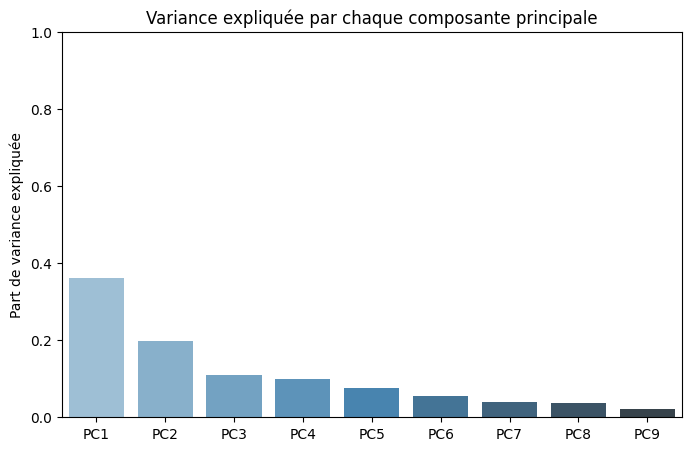

,Composante,Variance expliquée,Variance cumulée
0,PC1,0.3623,0.3623
1,PC2,0.1993,0.5617
2,PC3,0.1092,0.6708
3,PC4,0.0982,0.7690
4,PC5,0.0771,0.8461
5,PC6,0.0547,0.9008
6,PC7,0.0409,0.9416
7,PC8,0.0359,0.9775
8,PC9,0.0225,1.0000



 Coefficients des composantes principales :


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Inflight wifi service,0.157289,0.037905,0.822376,0.495618,-0.224030,0.007271,0.004164,0.018213,-0.035951
Seat comfort,0.305012,0.518808,-0.097214,0.017031,0.060405,0.048372,-0.145645,0.768453,-0.101707
Inflight entertainment,0.451688,0.277119,0.061917,-0.235961,-0.070632,0.001853,0.104529,-0.226180,0.769802
On-board service,0.379355,-0.288502,-0.064419,-0.087310,-0.166985,0.830037,-0.136387,-0.047229,-0.152990
Leg room service,0.302393,-0.230509,0.221639,-0.044695,0.894684,-0.031614,0.021322,-0.006086,-0.048495
Baggage handling,0.378895,-0.342760,-0.045540,-0.106571,-0.214292,-0.472151,-0.673165,-0.011118,-0.058319
Checkin service,0.217366,-0.071452,-0.496746,0.810839,0.077544,-0.029756,0.047814,-0.092820,0.160096
Inflight service,0.384724,-0.346877,-0.058199,-0.134305,-0.246757,-0.271923,0.700397,0.221287,-0.189429
Cleanliness,0.322541,0.522805,-0.070161,-0.043812,0.002447,-0.099443,0.052864,-0.545909,-0.552354


In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Variables de service
service_vars = [
    "Inflight wifi service",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness"
]

# 2. Données centrées et réduites
X = df_clean[service_vars]
X_scaled = StandardScaler().fit_transform(X)

# 3. PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


# 4. Variance expliquée
explained_var = pca.explained_variance_ratio_

# 5. Affichage du Scree Plot (courbe des valeurs propres)
plt.figure(figsize=(8, 5))
sns.barplot(x=[f"PC{i+1}" for i in range(len(explained_var))], y=explained_var, palette="Blues_d")
plt.ylabel("Part de variance expliquée")
plt.title("Variance expliquée par chaque composante principale")
plt.ylim(0, 1)
plt.show()


# Générer un tableau avec la variance expliquée
explained_df = pd.DataFrame({
    "Composante": [f"PC{i+1}" for i in range(len(explained_var))],
    "Variance expliquée": np.round(explained_var, 4),
    "Variance cumulée": np.round(np.cumsum(explained_var), 4)
})

display(explained_df)
# 6. Composantes principales sous forme de DataFrame
components_df = pd.DataFrame(pca.components_, columns=service_vars, index=[f"PC{i+1}" for i in range(len(service_vars))])
print("\n Coefficients des composantes principales :")
display(components_df.T)


## Interpretaion de l'analyse en Composantes Principales (ACP)

### 1. Variance expliquée par composante

| Composante | Variance expliquée | Variance cumulée |
|------------|---------------------|-------------------|
| PC1        | 36.23%              | 36.23%            |
| PC2        | 19.93%              | 56.17%            |
| PC3        | 10.92%              | 67.08%            |
| PC4        | 9.82%               | 76.90%            |
| PC5        | 7.71%               | 84.61%            |
| PC6        | 5.47%               | 90.08%            |
| PC7        | 4.09%               | 94.16%            |
| PC8        | 3.59%               | 97.75%            |
| PC9        | 2.25%               | 100.00%           |

**Interprétation :**
- Les deux premières composantes (PC1 et PC2) expliquent ensemble 56.17 % de la variance → suffisant pour une visualisation en 2D.
- Avec PC3 et PC4, on atteint plus de 75 %, ce qui permet une bonne analyse globale avec peu de perte d'information.
- À partir de PC5, chaque composante apporte peu (moins de 8 %).

---

### 2. Lecture des composantes principales

#### PC1 (36.23 %)
- Représente une dimension générale de satisfaction liée aux services à bord.
- Variables les plus contributrices :  
  `Inflight entertainment`, `On-board service`, `Inflight service`, `Baggage handling`, `Cleanliness`, `Seat comfort`  
  (coefficients ≈ 0.30 à 0.45)
- Interprétation : synthèse de l'expérience client globale.

#### PC2 (19.93 %)
- Oppose deux groupes de variables :
  - Positifs : `Seat comfort` (0.51), `Cleanliness` (0.52)
  - Négatifs : `On-board service`, `Baggage handling`, `Inflight service` (≈ -0.3 à -0.35)
- Interprétation : deux styles d’évaluation distincts → **confort & propreté** vs **services humains & logistiques**.

#### PC3 (10.92 %)
- Très fortement liée à :  
  - `Inflight wifi service` (0.82)  
  - Opposée à `Checkin service` (-0.49)
- Interprétation : dimension technologique individuelle, contrastée avec l’accueil en aéroport.

#### PC4 (9.82 %)
- Principalement portée par :  
  - `Checkin service` (0.81)
- Interprétation : axe très spécifique centré sur le processus d'enregistrement.


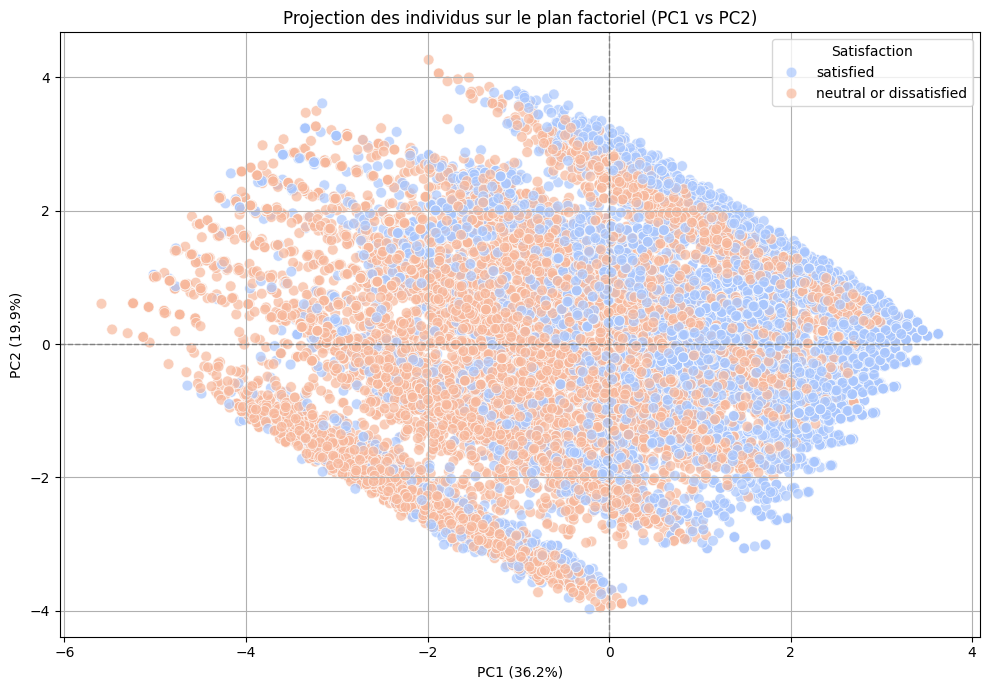

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Création d'un DataFrame avec les 2 premières composantes
pca_df = pd.DataFrame(X_pca[:, :2], columns=["PC1", "PC2"])
pca_df["satisfaction"] = df_clean["satisfaction"].values  # Ajout de la satisfaction

# 2. Affichage du nuage de points (PC1 vs PC2)
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="satisfaction",
    palette="coolwarm",
    alpha=0.7,
    s=60
)
plt.title("Projection des individus sur le plan factoriel (PC1 vs PC2)")
plt.xlabel(f"PC1 ({explained_df.loc[0, 'Variance expliquée']*100:.1f}%)")
plt.ylabel(f"PC2 ({explained_df.loc[1, 'Variance expliquée']*100:.1f}%)")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend(title="Satisfaction")
plt.grid(True)
plt.tight_layout()
plt.show()


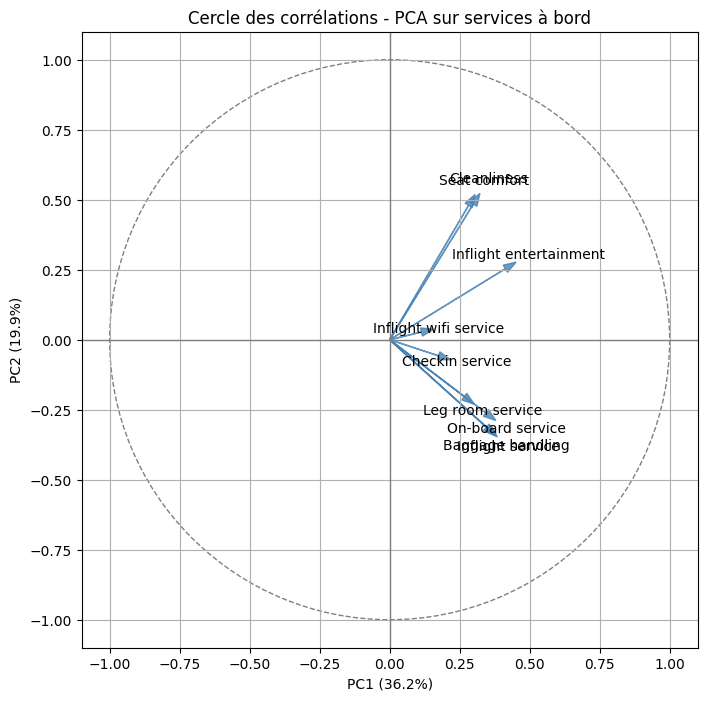

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Extraire les deux premières composantes principales
pcs = pca.components_[0:2, :]  # lignes PC1 et PC2
labels = service_vars

# 2. Cercle des corrélations
plt.figure(figsize=(8, 8))
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)

# Cercle unité
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_patch(circle)

# Flèches des variables
for i in range(len(pcs[0])):
    plt.arrow(0, 0, pcs[0, i], pcs[1, i], color='steelblue', alpha=0.8, head_width=0.03, length_includes_head=True)
    plt.text(pcs[0, i]*1.1, pcs[1, i]*1.1, labels[i], ha='center', va='center', fontsize=10)

# Axes et titre
plt.xlabel(f"PC1 ({explained_df.loc[0, 'Variance expliquée']*100:.1f}%)")
plt.ylabel(f"PC2 ({explained_df.loc[1, 'Variance expliquée']*100:.1f}%)")
plt.title("Cercle des corrélations - PCA sur services à bord")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()



In [21]:
# 1. Contribution des variables à PC1 et PC2 (%)
# On élève les coefficients au carré pour avoir une mesure de l'inertie (importance relative)
contrib = pd.DataFrame({
    "Variable": service_vars,
    "Contribution PC1 (%)": np.round(100 * pca.components_[0]**2 / sum(pca.components_[0]**2), 2),
    "Contribution PC2 (%)": np.round(100 * pca.components_[1]**2 / sum(pca.components_[1]**2), 2)
}).sort_values("Contribution PC1 (%)", ascending=False)

display(contrib)


# 2. Cos² pour PC1 et PC2
cos2 = pd.DataFrame({
    "Variable": service_vars,
    "Cos² PC1": np.round(pca.components_[0]**2, 4),
    "Cos² PC2": np.round(pca.components_[1]**2, 4),
    "Cos² Total (PC1+PC2)": np.round(pca.components_[0]**2 + pca.components_[1]**2, 4)
}).sort_values("Cos² Total (PC1+PC2)", ascending=False)

display(cos2)


,Variable,Contribution PC1 (%),Contribution PC2 (%)
2,Inflight entertainment,20.40,7.68
7,Inflight service,14.80,12.03
3,On-board service,14.39,8.32
5,Baggage handling,14.36,11.75
8,Cleanliness,10.40,27.33
1,Seat comfort,9.30,26.92
4,Leg room service,9.14,5.31
6,Checkin service,4.72,0.51
0,Inflight wifi service,2.47,0.14


,Variable,Cos² PC1,Cos² PC2,Cos² Total (PC1+PC2)
8,Cleanliness,0.1040,0.2733,0.3774
1,Seat comfort,0.0930,0.2692,0.3622
2,Inflight entertainment,0.2040,0.0768,0.2808
7,Inflight service,0.1480,0.1203,0.2683
5,Baggage handling,0.1436,0.1175,0.2610
3,On-board service,0.1439,0.0832,0.2271
4,Leg room service,0.0914,0.0531,0.1446
6,Checkin service,0.0472,0.0051,0.0524
0,Inflight wifi service,0.0247,0.0014,0.0262


## Analyse des composantes principales : lecture approfondie

### PC1 : Axe de la satisfaction globale perçue

#### Variables les plus contributives à PC1

| Variable               | Contribution PC1 (%) |
|------------------------|-----------------------|
| Inflight entertainment | 20.40                |
| Inflight service       | 14.80                |
| On-board service       | 14.39                |
| Baggage handling       | 14.36                |
| Cleanliness            | 10.40                |

**Interprétation :**

PC1 capte une dimension générale de la **qualité de service perçue à bord**, en particulier :
- Divertissement
- Propreté
- Service personnel
- Gestion des bagages

C’est l’axe qui **sépare le plus clairement** les passagers satisfaits des insatisfaits.

#### Variables peu contributives à PC1

| Variable              | Contribution PC1 (%) |
|------------------------|-----------------------|
| Inflight wifi service  | 2.47                 |
| Checkin service        | 4.72                 |

Ces variables sont peu discriminantes sur cet axe.

---

### PC2 : Axe des préférences spécifiques (confort et propreté)

#### Variables les plus contributives à PC2

| Variable       | Contribution PC2 (%) |
|----------------|----------------------|
| Cleanliness    | 27.33               |
| Seat comfort   | 26.92               |
| Inflight service | 12.03             |

**Interprétation :**

PC2 semble distinguer des préférences **plus ciblées**, notamment l’importance accordée à :
- L’hygiène
- Le confort des sièges

Les variables logistiques ou numériques (wifi, check-in) contribuent peu à cette dimension.

---

### Cos² : Fiabilité de la projection des variables sur le plan PC1-PC2

#### Bien représentées dans le plan

| Variable               | Cos² (PC1 + PC2) |
|------------------------|------------------|
| Cleanliness            | 0.3774           |
| Seat comfort           | 0.3622           |
| Inflight entertainment | 0.2808           |
| Inflight service       | 0.2683           |
| Baggage handling       | 0.2610           |

 Ces 5 variables sont **à privilégier** dans l’analyse graphique (plan PC1-PC2).

#### Mal représentées dans le plan

| Variable              | Cos² (PC1 + PC2) |
|------------------------|------------------|
| Inflight wifi service  | 0.0262           |
| Checkin service        | 0.0524           |

 Ces variables sont **mieux interprétées dans d’autres dimensions** (PC3, PC4...).


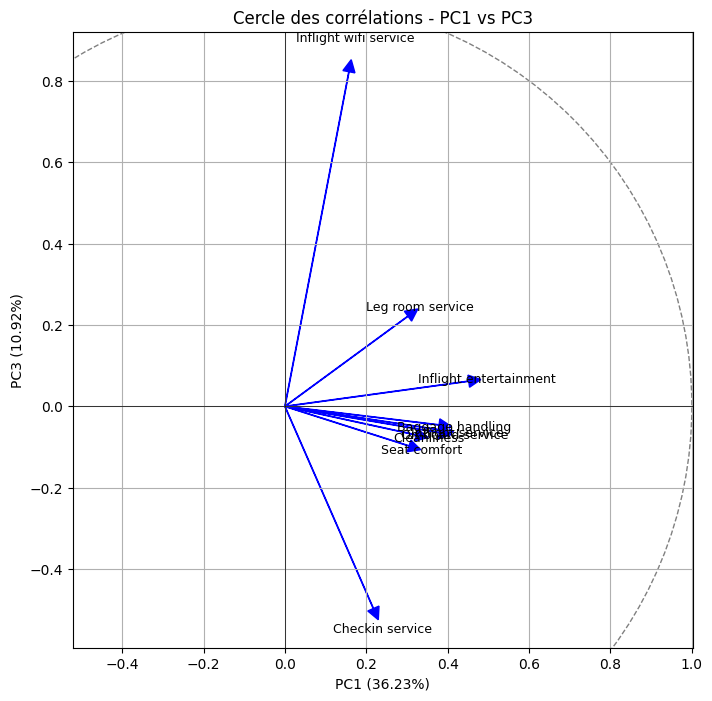

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Variables de service
service_vars = [
    "Inflight wifi service",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness"
]

# 2. Standardisation
X = df_clean[service_vars]
X_scaled = StandardScaler().fit_transform(X)

# 3. PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
components = pca.components_

# 4. Cercle des corrélations pour PC1 vs PC3
pc1 = 0
pc3 = 2

plt.figure(figsize=(8, 8))
for i, var in enumerate(service_vars):
    x = components[pc1, i]
    y = components[pc3, i]
    plt.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, fc='blue', ec='blue')
    plt.text(x * 1.1, y * 1.1, var, ha='center', va='center', fontsize=9)

# Cercle unité
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.title("Cercle des corrélations - PC1 vs PC3")
plt.xlabel("PC1 (%.2f%%)" % (pca.explained_variance_ratio_[0]*100))
plt.ylabel("PC3 (%.2f%%)" % (pca.explained_variance_ratio_[2]*100))
plt.grid(True)
plt.axis('equal')
plt.show()


Cos²                     Contribution             \
                             PC1       PC2       PC3          PC1        PC2   
Inflight wifi service   0.024740  0.001437  0.676302     2.473981   0.143679   
Seat comfort            0.093032  0.269162  0.009451     9.303206  26.916198   
Inflight entertainment  0.204022  0.076795  0.003834    20.402191   7.679507   
On-board service        0.143910  0.083233  0.004150    14.391008   8.323344   
Leg room service        0.091442  0.053134  0.049124     9.144159   5.313429   
Baggage handling        0.143561  0.117485  0.002074    14.356119  11.748473   
Checkin service         0.047248  0.005105  0.246756     4.724781   0.510533   
Inflight service        0.148013  0.120323  0.003387    14.801278  12.032343   
Cleanliness             0.104033  0.273325  0.004923    10.403278  27.332493   

                                   
                              PC3  
Inflight wifi service   67.630225  
Seat comfort             0.945058  
Inflight entertainment   0.383367  
On-board service         0.414981  
Leg room service         4.912376  
Baggage handling         0.207388  
Checkin service         24.675636  
Inflight service         0.338708  
Cleanliness              0.492261

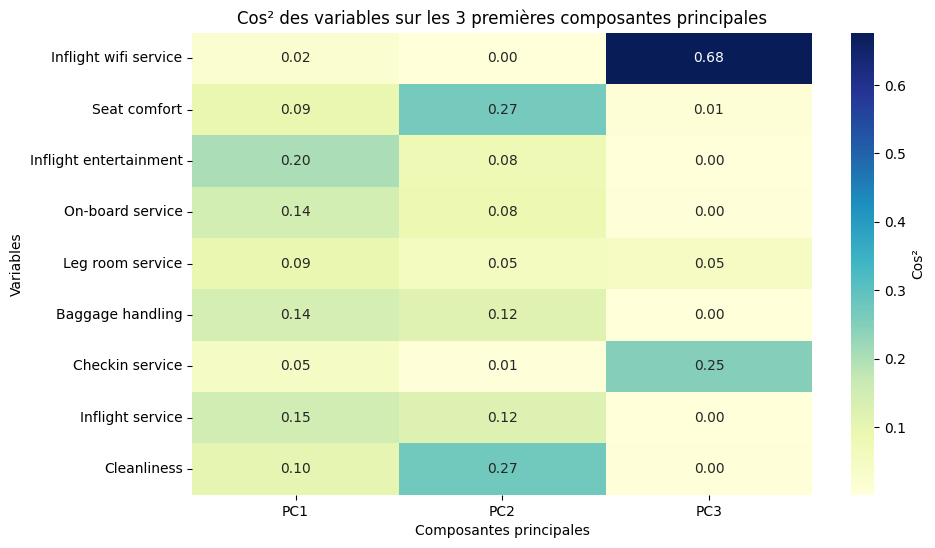

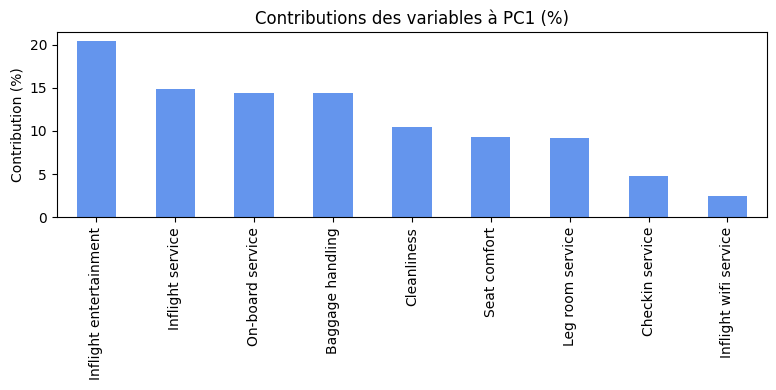

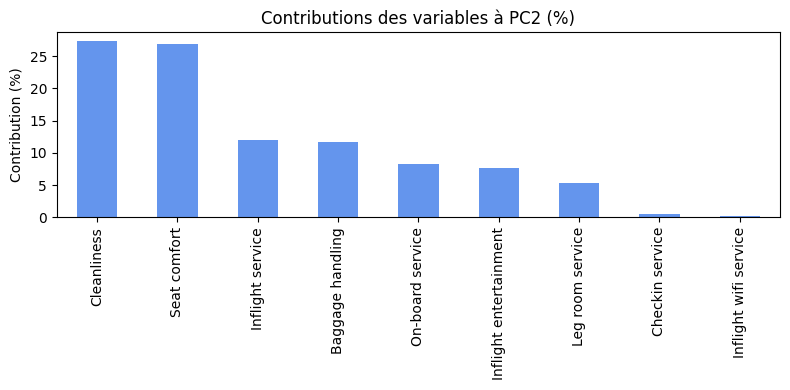

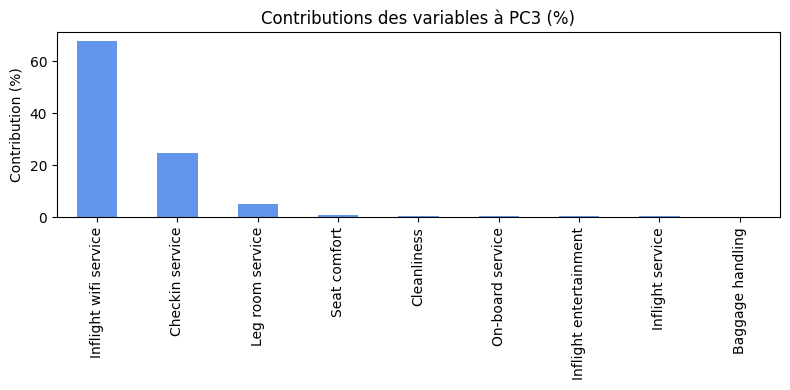

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Variables à étudier
service_vars = [
    "Inflight wifi service",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness"
]

# 2. Données centrées-réduites
X = df_clean[service_vars]
X_scaled = StandardScaler().fit_transform(X)

# 3. PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 4. Matrice des composantes principales (loadings)
components = pd.DataFrame(pca.components_.T, index=service_vars, columns=[f"PC{i+1}" for i in range(len(service_vars))])

# 5. Calcul du cos² (correlation carrée avec les axes)
cos2 = components**2

# 6. Calcul des contributions (%)
# Somme des carrés des coefficients par composante
squared_loadings_sum = cos2.sum()
# Contribution de chaque variable à chaque composante
contributions = cos2.divide(squared_loadings_sum, axis=1) * 100

# 7. Affichage des Top contributeurs PC1 et PC2 et PC3
#for pc in ['PC1', 'PC2','PC3']:
 #   print(f"\n Top contributeurs à {pc} :")
  #  display(contributions[pc].sort_values(ascending=False).head())

summary = pd.concat([cos2[['PC1', 'PC2','PC3']], contributions[['PC1', 'PC2','PC3']]],
                    axis=1, keys=["Cos²", "Contribution"])
display(summary)


# 8. Heatmap Cos²
plt.figure(figsize=(10, 6))
sns.heatmap(cos2.iloc[:, :3], annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={"label": "Cos²"})
plt.title("Cos² des variables sur les 3 premières composantes principales")
plt.ylabel("Variables")
plt.xlabel("Composantes principales")
plt.show()

# 9. Barplot Contributions PC1
plt.figure(figsize=(8, 4))
contributions["PC1"].sort_values(ascending=False).plot(kind="bar", color="cornflowerblue")
plt.title("Contributions des variables à PC1 (%)")
plt.ylabel("Contribution (%)")
plt.tight_layout()
plt.show()

# 9. Barplot Contributions PC2
plt.figure(figsize=(8, 4))
contributions["PC2"].sort_values(ascending=False).plot(kind="bar", color="cornflowerblue")
plt.title("Contributions des variables à PC2 (%)")
plt.ylabel("Contribution (%)")
plt.tight_layout()
plt.show()

# 9. Barplot Contributions PC3
plt.figure(figsize=(8, 4))
contributions["PC3"].sort_values(ascending=False).plot(kind="bar", color="cornflowerblue")
plt.title("Contributions des variables à PC3 (%)")
plt.ylabel("Contribution (%)")
plt.tight_layout()
plt.show()


## Interprétation des composantes principales

### 1. Interprétation de PC1 (36.2% de la variance)

#### Variables avec forte contribution à PC1

| Variable               | Cos² PC1 | Contribution PC1 (%) |
|------------------------|----------|------------------------|
| Inflight entertainment | 0.2040   | 20.4                   |
| Inflight service       | 0.1480   | 14.8                   |
| On-board service       | 0.1439   | 14.4                   |
| Baggage handling       | 0.1436   | 14.4                   |
| Cleanliness            | 0.1040   | 10.4                   |
| Seat comfort           | 0.0930   | 9.3                    |

**Résumé :**  
PC1 représente une **dimension générale de la qualité de service perçue à bord**.  
Les variables les plus corrélées à PC1 sont toutes liées à **l’expérience client directe** : divertissement, service personnel, propreté, confort, etc.

---

### 2. Interprétation de PC2 (19.9% de la variance)

#### Variables dominantes

| Variable         | Cos² PC2 | Contribution PC2 (%) |
|------------------|----------|------------------------|
| Cleanliness      | 0.2733   | 27.3                   |
| Seat comfort     | 0.2692   | 26.9                   |
| Baggage handling | 0.1175   | 11.7                   |
| Inflight service | 0.1203   | 12.0                   |

**Résumé :**  
PC2 capte une autre facette de l’expérience passager, probablement liée à la **perception du confort physique et de la propreté**.

---

### 3. Interprétation de PC3 (10.9% de la variance)

#### Variables dominantes

| Variable              | Cos² PC3 | Contribution PC3 (%) |
|------------------------|----------|------------------------|
| Inflight wifi service  | 0.6763   | 67.6                   |
| Checkin service        | 0.2468   | 24.7                   |

**Résumé :**  
PC3 représente clairement une dimension **liée à l’expérience numérique ou digitale**, distincte de l’expérience à bord.

---

### Conclusion visuelle des axes

| Axe  | Dimension sémantique                       | Variables clés                                      |
|------|--------------------------------------------|----------------------------------------------------|
| PC1  | Satisfaction globale à bord                | Inflight entertainment, Inflight service, etc.     |
| PC2  | Propreté & confort physique                | Cleanliness, Seat comfort                          |
| PC3  | Expérience numérique & pré-embarquement    | Inflight wifi service, Checkin service             |
